In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('insurance_pre.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [6]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [7]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes' ]]

In [8]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [9]:
dependent=dataset[['charges']]

In [10]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [11]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)


In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)  

In [13]:
from sklearn.model_selection  import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid={'criterion':['squared_error', 'friedman_mse','absolute_error','poisson'],'splitter':['best','random'],'max_features':['sqrt','log2',None]}

grid=GridSearchCV(DecisionTreeRegressor(),param_grid,refit=True,verbose=3,n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             verbose=3)

In [14]:
re=grid.cv_results_

print("The R_score value for best parameters {}: ".format(grid.best_params_))

The R_score value for best parameters {'criterion': 'friedman_mse', 'max_features': None, 'splitter': 'best'}: 


In [15]:
table=pd.DataFrame.from_dict(re)

In [16]:
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005855,0.005185,0.003803,0.006208,squared_error,sqrt,best,"{'criterion': 'squared_error', 'max_features':...",0.627097,0.602328,0.646747,0.669098,0.704132,0.649880,0.034936,5
1,0.005534,0.002819,0.000603,0.001207,squared_error,sqrt,random,"{'criterion': 'squared_error', 'max_features':...",0.560263,0.564668,0.501348,0.586782,0.686943,0.580001,0.060487,22
2,0.006011,0.002375,0.004058,0.001002,squared_error,log2,best,"{'criterion': 'squared_error', 'max_features':...",0.710202,0.614498,0.612249,0.560498,0.569141,0.613318,0.053161,17
3,0.004131,0.002221,0.003753,0.002552,squared_error,log2,random,"{'criterion': 'squared_error', 'max_features':...",0.616898,0.460150,0.582444,0.584996,0.589615,0.566820,0.054736,23
4,0.008065,0.000294,0.002247,0.001534,squared_error,None,best,"{'criterion': 'squared_error', 'max_features':...",0.740399,0.539892,0.786679,0.630147,0.647547,0.668933,0.086700,4
5,0.005262,0.002216,0.004294,0.001994,squared_error,None,random,"{'criterion': 'squared_error', 'max_features':...",0.701004,0.544367,0.620140,0.581734,0.662178,0.621884,0.055691,15
6,0.005916,0.000737,0.003205,0.001868,friedman_mse,sqrt,best,"{'criterion': 'friedman_mse', 'max_features': ...",0.775892,0.448019,0.674460,0.618951,0.634175,0.630300,0.106318,13
7,0.003810,0.001936,0.002266,0.002762,friedman_mse,sqrt,random,"{'criterion': 'friedman_mse', 'max_features': ...",0.735308,0.541659,0.479997,0.585340,0.442845,0.557030,0.101777,24
8,0.006419,0.002748,0.003245,0.002544,friedman_mse,log2,best,"{'criterion': 'friedman_mse', 'max_features': ...",0.794267,0.575919,0.644022,0.561428,0.598938,0.634915,0.084441,11
9,0.004903,0.001017,0.003090,0.002867,friedman_mse,log2,random,"{'criterion': 'friedman_mse', 'max_features': ...",0.707891,0.656732,0.506460,0.641999,0.521005,0.606817,0.079222,19


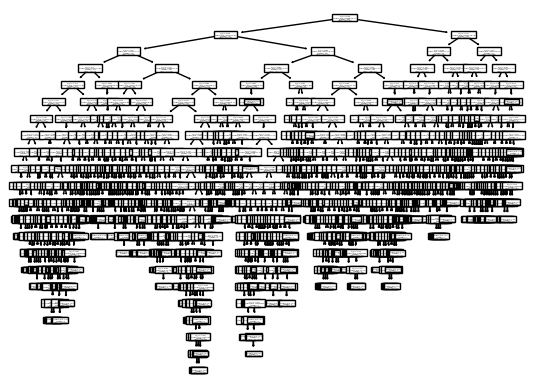

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree
best_tree = grid.best_estimator_
tree.plot_tree(best_tree)
plt.show( )

In [18]:
y_pred=grid.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [20]:
r_score

0.6973331765102332